In [ ]:
# Install the required libraries
!pip install prophet
!pip install xlsxwriter

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
# Import the `files` library to allow files upload
from google.colab import files

## MTA NYC Daily Ridership Data starting March 2020
### Purpose: to understand commuting trends in the Metro NYC area pre/post Covid. Although the data begins during COVID, the dataset contains a column provided by the gov indicating expected pre-COVID ridership levels as a comparison point.

NYC Daily MTA Ridership data March 2020 - July 2024
Source: https://catalog.data.gov/dataset/mta-daily-ridership-data-beginning-2020

In [ ]:
# Upload "MTA_Daily_Ridership_Data.csv" into Colab, then store in a DataFrame
uploaded = files.upload()

Saving MTA_Daily_Ridership_Data__Beginning_2020.csv to MTA_Daily_Ridership_Data__Beginning_2020 (1).csv


In [ ]:
daily_ridership = pd.read_csv(
    "MTA_Daily_Ridership_Data__Beginning_2020.csv",
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# Display the first and last five rows of the DataFrame
daily_ridership.sort_index(inplace =True)

display(daily_ridership.head())
display(daily_ridership.tail())

<ipython-input-5-ba7b8de357da>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  daily_ridership = pd.read_csv(


,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
Date,,,,,,,,,,,,,,
2020-03-02,5329915,0.96,2209066,0.99,321569.0,1.03,180702,0.66,30338,1.02,874620,0.95,17140.0,1.07
2020-03-03,5481103,0.98,2228608,0.99,319727.0,1.02,190648,0.69,32767,1.10,882175,0.96,17453.0,1.09
2020-03-04,5498809,0.99,2177165,0.97,311662.0,0.99,192689,0.70,34297,1.15,905558,0.98,17136.0,1.07
2020-03-05,5496453,0.99,2244515,1.00,307597.0,0.98,194387,0.70,33209,1.12,929298,1.01,17203.0,1.08
2020-03-06,5189447,0.93,2066743,0.92,289171.0,0.92,205056,0.74,30970,1.04,945408,1.03,15285.0,0.96


,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
Date,,,,,,,,,,,,,,
2024-07-21,1877551,0.80,656891,0.60,126169.0,1.20,111438,1.05,21664,1.31,962715,1.09,2080.0,0.58
2024-07-22,3235046,0.61,1161435,0.56,231813.0,0.73,215087,0.76,32431,1.14,937858,0.98,6510.0,0.47
2024-07-23,3605664,0.68,1197058,0.58,247915.0,0.78,229842,0.81,35110,1.24,928295,0.97,7177.0,0.52
2024-07-24,3654248,0.69,1192941,0.58,249158.0,0.79,224862,0.79,36652,1.29,947798,0.99,7255.0,0.53
2024-07-25,3634815,0.69,1123778,0.54,255367.0,0.81,214281,0.76,35373,1.25,990676,1.03,6844.0,0.50


In [ ]:
# sort data by Date
print(daily_ridership.columns)
print(len(daily_ridership))
print(daily_ridership.dtypes)

Index(['Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day'],
      dtype='object')
1575
Subways: Total Estimated Ridership                           int64
Subways: % of Comparable Pre-Pandemic Day                  float64
Buses: Total Estimated Ridership                             int64
Buses: % of Comparable Pre-Pandemic Day       

In [ ]:
# Rename Columns to remove strings
dr_df = daily_ridership.rename(columns = {"Subways: Total Estimated Ridership" : "subway_est",
                                          "Subways: % of Comparable Pre-Pandemic Day" : "subway_comp",
                                          "Buses: Total Estimated Ridership" : "bus_est",
                                          "Buses: % of Comparable Pre-Pandemic Day" : "bus_comp",
                                          "LIRR: Total Estimated Ridership" : "lirr_est",
                                          "LIRR: % of Comparable Pre-Pandemic Day" : "lirr_comp",
                                          "Metro-North: Total Estimated Ridership" : "metro_north_est",
                                          "Metro-North: % of Comparable Pre-Pandemic Day" : "metro_north_comp",
                                          "Access-A-Ride: Total Scheduled Trips" : "access_a_ride_est",
                                          "Access-A-Ride: % of Comparable Pre-Pandemic Day" : "access_a_ride_comp",
                                          "Bridges and Tunnels: Total Traffic" : "bridge_tunnel_est",
                                          "Bridges and Tunnels: % of Comparable Pre-Pandemic Day" : "bridge_tunnel_comp",
                                          "Staten Island Railway: Total Estimated Ridership" : "sir_est",
                                          "Staten Island Railway: % of Comparable Pre-Pandemic Day" : "sir_comp"
                                          })

dr_df.head()





,subway_est,subway_comp,bus_est,bus_comp,lirr_est,lirr_comp,metro_north_est,metro_north_comp,access_a_ride_est,access_a_ride_comp,bridge_tunnel_est,bridge_tunnel_comp,sir_est,sir_comp
Date,,,,,,,,,,,,,,
2020-03-02,5329915,0.96,2209066,0.99,321569.0,1.03,180702,0.66,30338,1.02,874620,0.95,17140.0,1.07
2020-03-03,5481103,0.98,2228608,0.99,319727.0,1.02,190648,0.69,32767,1.10,882175,0.96,17453.0,1.09
2020-03-04,5498809,0.99,2177165,0.97,311662.0,0.99,192689,0.70,34297,1.15,905558,0.98,17136.0,1.07
2020-03-05,5496453,0.99,2244515,1.00,307597.0,0.98,194387,0.70,33209,1.12,929298,1.01,17203.0,1.08
2020-03-06,5189447,0.93,2066743,0.92,289171.0,0.92,205056,0.74,30970,1.04,945408,1.03,15285.0,0.96


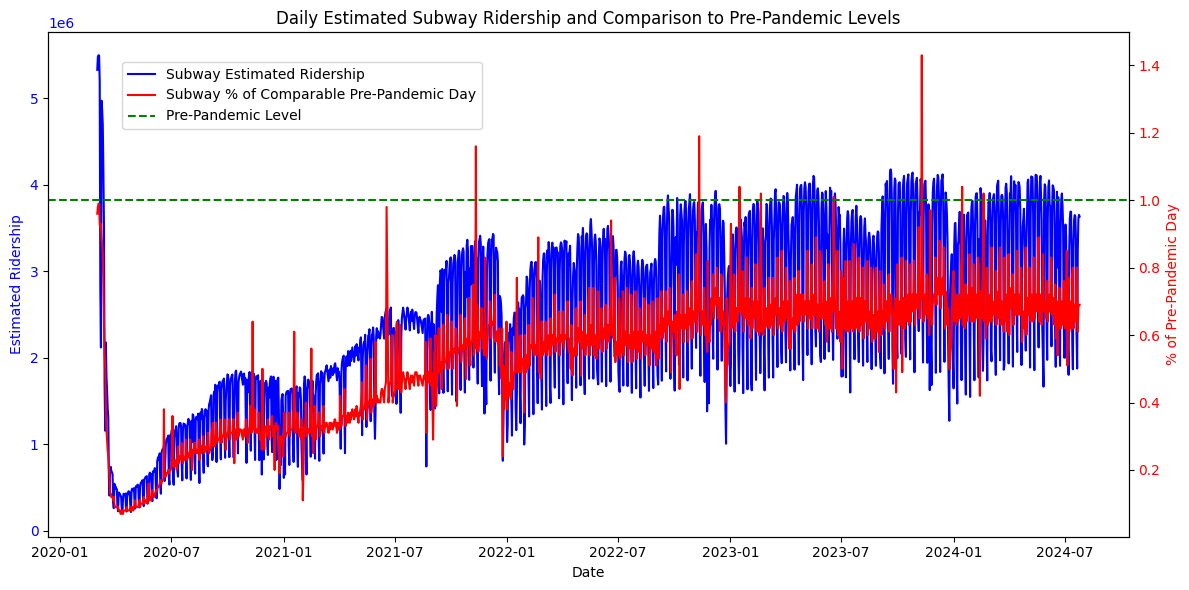

In [ ]:
# Plotting Subway Data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot subway_est on the primary y-axis
ax1.plot(dr_df.index, dr_df['subway_est'], label='Subway Estimated Ridership', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(dr_df.index, dr_df['subway_comp'], label='Subway % of Comparable Pre-Pandemic Day', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and legend
plt.title('Daily Estimated Subway Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.show()

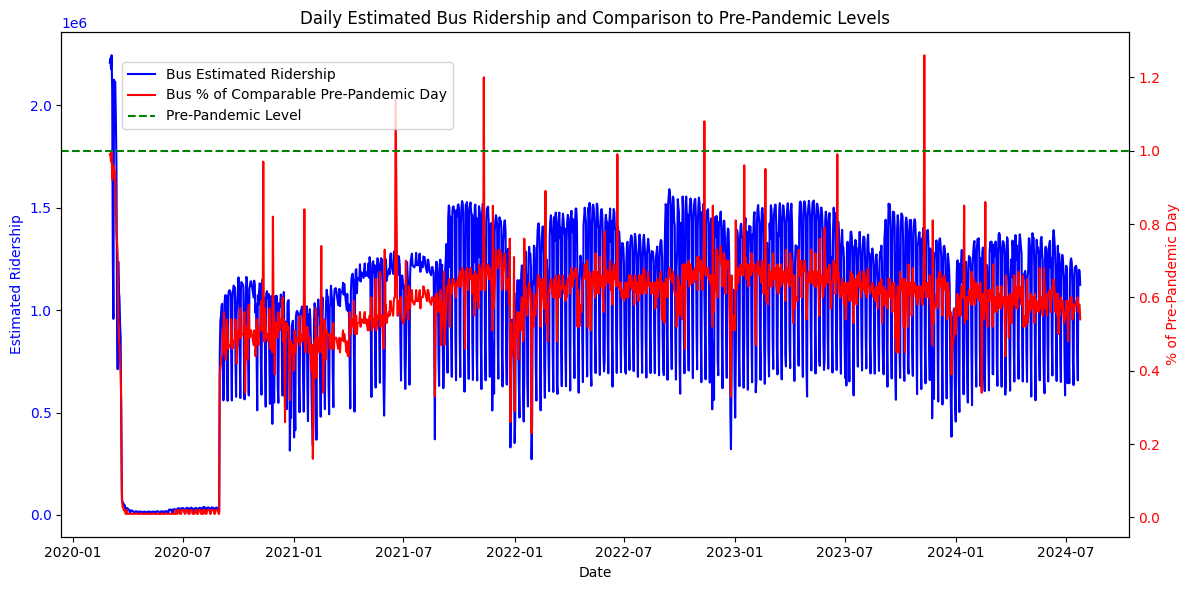

In [ ]:
# Plot for bus
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot subway_est on the primary y-axis
ax1.plot(dr_df.index, dr_df['bus_est'], label='Bus Estimated Ridership', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(dr_df.index, dr_df['bus_comp'], label='Bus % of Comparable Pre-Pandemic Day', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and legend
plt.title('Daily Estimated Bus Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.show()

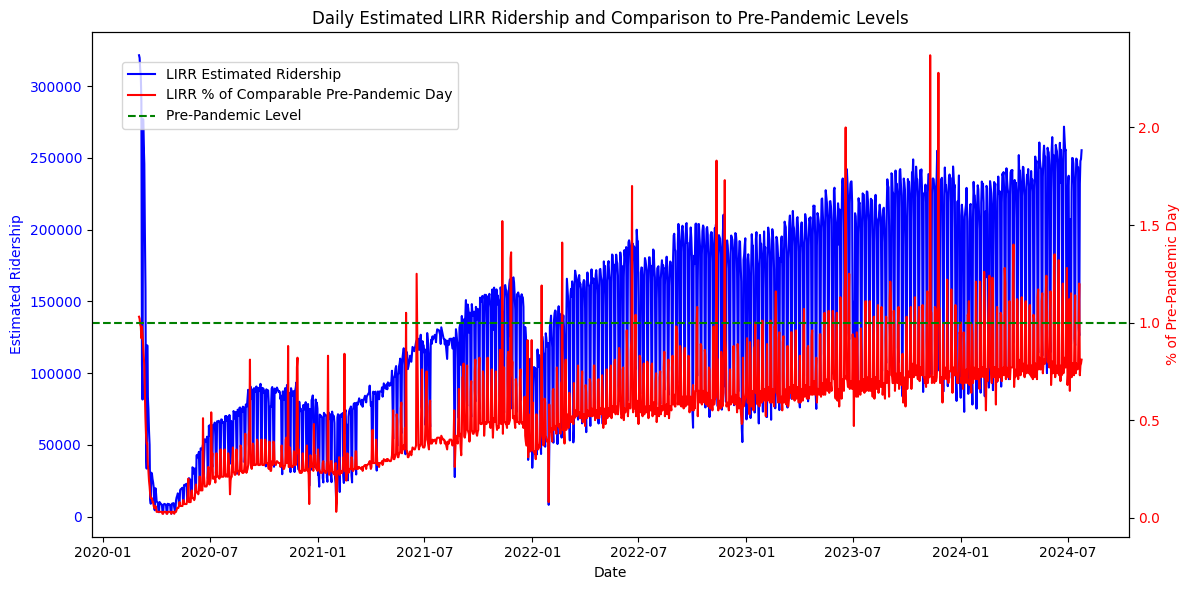

In [ ]:
# Plot for LIRR
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot subway_est on the primary y-axis
ax1.plot(dr_df.index, dr_df['lirr_est'], label='LIRR Estimated Ridership', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(dr_df.index, dr_df['lirr_comp'], label='LIRR % of Comparable Pre-Pandemic Day', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and legend
plt.title('Daily Estimated LIRR Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.show()

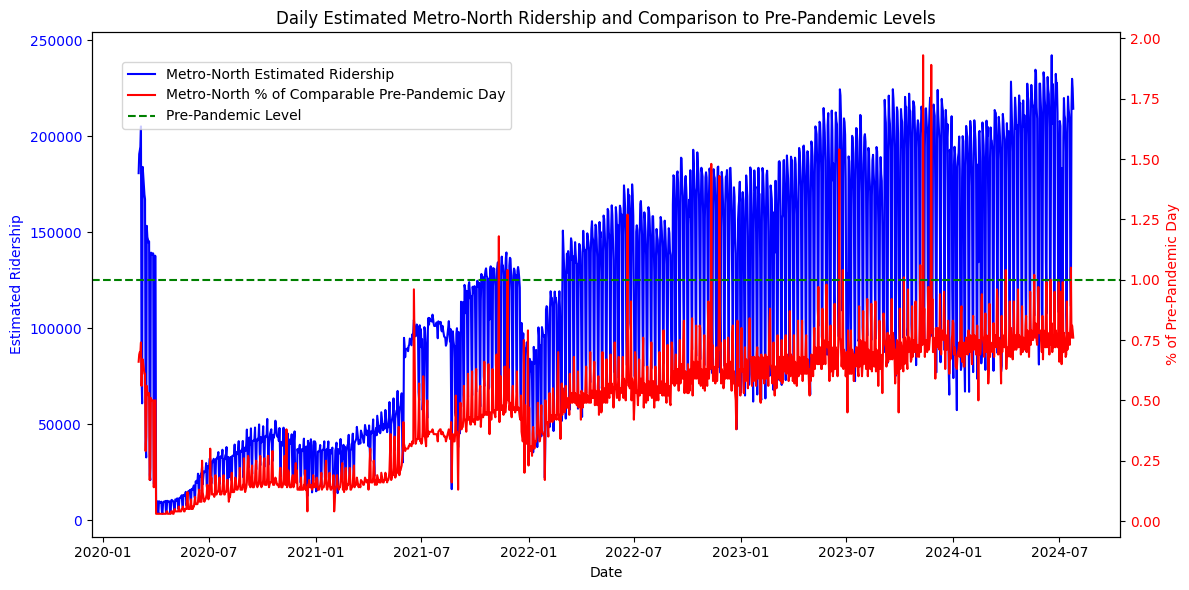

In [ ]:
# Plot for Metro-North
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot subway_est on the primary y-axis
ax1.plot(dr_df.index, dr_df['metro_north_est'], label='Metro-North Estimated Ridership', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(dr_df.index, dr_df['metro_north_comp'], label='Metro-North % of Comparable Pre-Pandemic Day', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and legend
plt.title('Daily Estimated Metro-North Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.show()

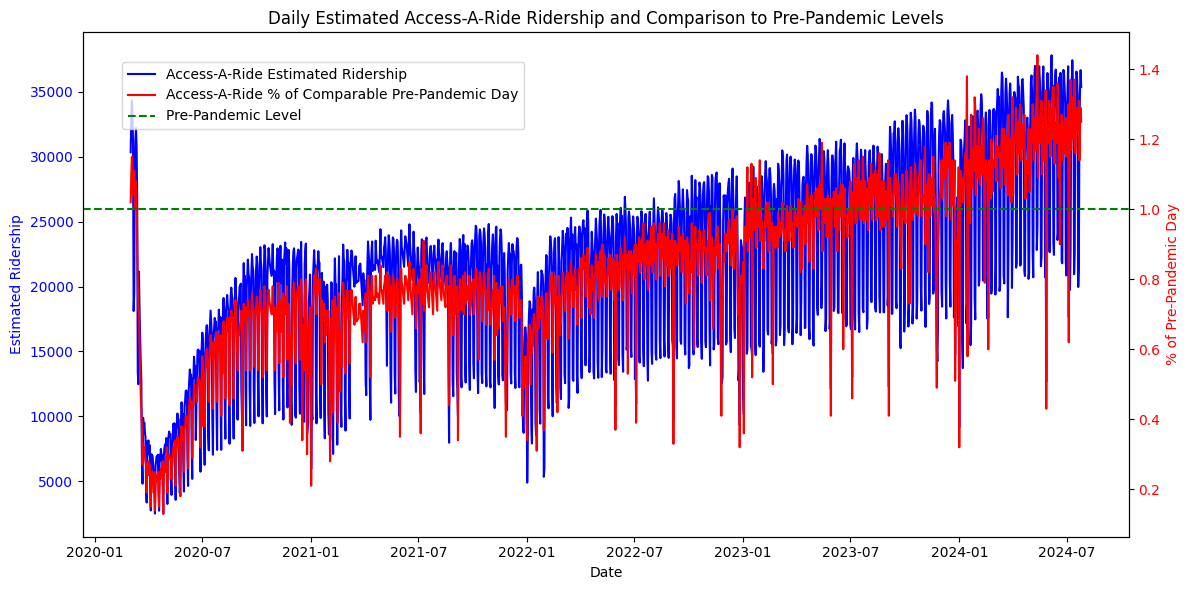

In [ ]:
# Plot for Access-A-Ride Handicap Transportation
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot subway_est on the primary y-axis
ax1.plot(dr_df.index, dr_df['access_a_ride_est'], label='Access-A-Ride Estimated Ridership', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(dr_df.index, dr_df['access_a_ride_comp'], label='Access-A-Ride % of Comparable Pre-Pandemic Day', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and legend
plt.title('Daily Estimated Access-A-Ride Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.show()

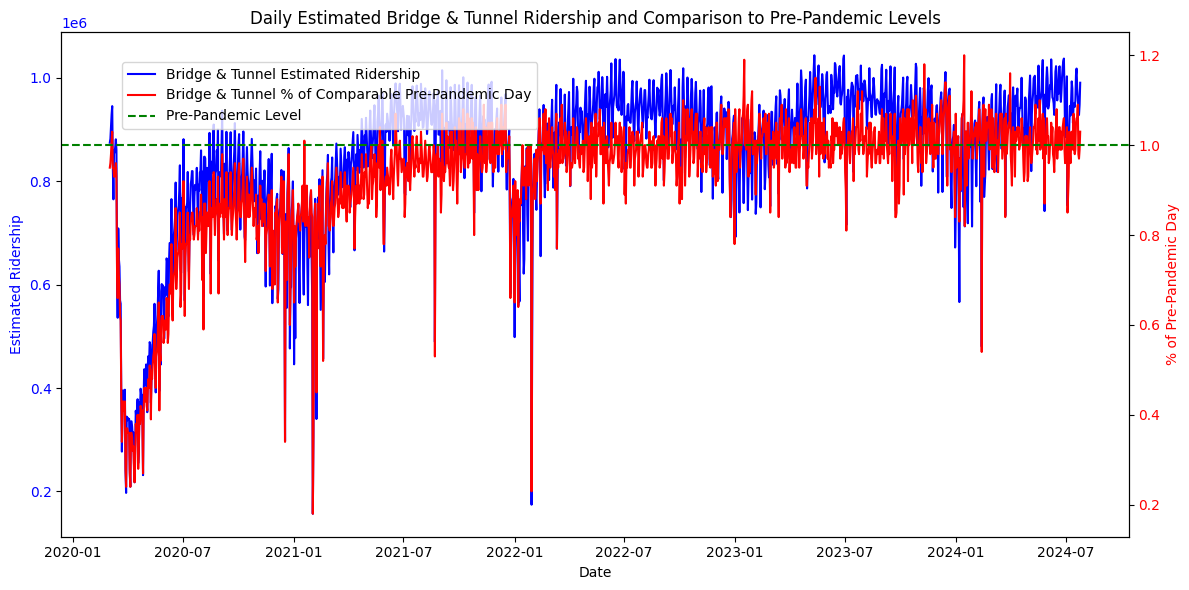

In [ ]:
# Plot for Bridge & Tunnel
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot subway_est on the primary y-axis
ax1.plot(dr_df.index, dr_df['bridge_tunnel_est'], label='Bridge & Tunnel Estimated Ridership', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(dr_df.index, dr_df['bridge_tunnel_comp'], label='Bridge & Tunnel % of Comparable Pre-Pandemic Day', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and legend
plt.title('Daily Estimated Bridge & Tunnel Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.show()

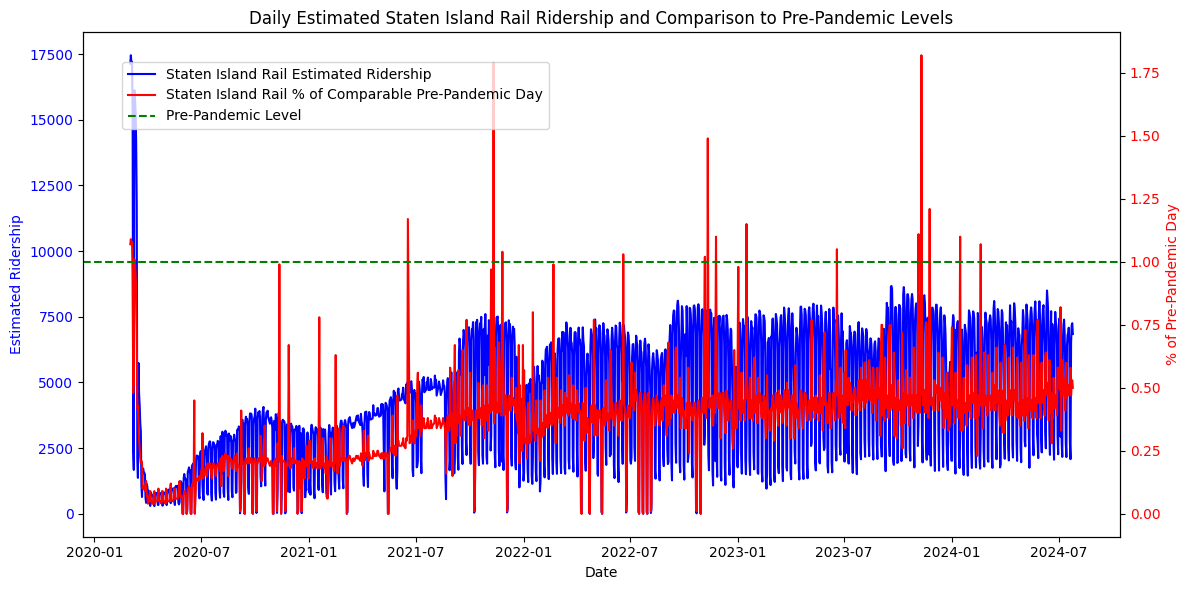

In [ ]:
# Plot for Staten Island Rail
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot subway_est on the primary y-axis
ax1.plot(dr_df.index, dr_df['sir_est'], label='Staten Island Rail Estimated Ridership', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(dr_df.index, dr_df['sir_comp'], label='Staten Island Rail % of Comparable Pre-Pandemic Day', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and legend
plt.title('Daily Estimated Staten Island Rail Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.show()

In [ ]:
# Average est and comp by category by day of week
# Test it out for different time periods
dr_df['day_of_week'] = dr_df.index.day_name()

average_ridership_by_day = dr_df.groupby('day_of_week').mean()

days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_ridership_by_day = average_ridership_by_day.reindex(days_of_week_order)

print(average_ridership_by_day)

               subway_est  subway_comp       bus_est  bus_comp       lirr_est  \
day_of_week                                                                     
Monday       2.538669e+06     0.507696  1.079326e+06  0.541435  143521.526087   
Tuesday      2.856833e+06     0.521478  1.170607e+06  0.542826  159118.286957   
Wednesday    2.923502e+06     0.533000  1.188358e+06  0.552130  159069.921739   
Thursday     2.876048e+06     0.532478  1.157054e+06  0.543870  155029.556522   
Friday       2.729566e+06     0.517860  1.109467e+06  0.533799  149804.467249   
Saturday     1.852100e+06     0.599765  7.079889e+05  0.530939   82745.577465   
Sunday       1.469769e+06     0.613239  5.542583e+05  0.548310   70042.004695   

             lirr_comp  metro_north_est  metro_north_comp  access_a_ride_est  \
day_of_week                                                                    
Monday        0.531522    117657.847826          0.465609       21835.934783   
Tuesday       0.505739    1352

## MTA Monthly Ridership since Jan 2008 Dataset
### Purpose: Monthly Ridership dataset across same modes of transport with longer pre-COVID data window to demonstrate change in pre/post trend

Source: https://catalog.data.gov/dataset/mta-monthly-ridership-traffic-data-beginning-january-2008

In [ ]:
# Upload "MTA_Monthly_Ridership_Data.csv" into Colab, then store in a DataFrame
uploaded = files.upload()

Saving MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv to MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008 (2).csv


In [ ]:
monthly_mta = pd.read_csv(
    "MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv",
    index_col='Month',
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# Display the first and last five rows of the DataFrame
monthly_mta.sort_index(inplace =True)

display(monthly_mta.head())
display(monthly_mta.tail())

<ipython-input-22-fc1fb6d305db>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  monthly_mta = pd.read_csv(


,Agency,Ridership
Month,,
2008-01-01,MNR,6453734
2008-02-01,MNR,6144377
2008-03-01,MNR,6602280
2008-04-01,B&T,24900328
2008-04-01,MNR,6787480


,Agency,Ridership
Month,,
2024-02-01,AAR,944524
2024-02-01,SIR,176396
2024-02-01,B&T,25061171
2024-02-01,MNR,4710620
2024-02-01,LIRR,5331553


In [ ]:
agencies = monthly_mta['Agency'].unique()
agencies

array(['MNR', 'B&T', 'Bus', 'Subway', 'LIRR', 'AAR', 'SIR'], dtype=object)

In [ ]:
subway = monthly_mta.loc[monthly_mta['Agency'] == "Subway"]

print(subway)

            Agency  Ridership
Month                        
2018-01-01  Subway  134683435
2018-02-01  Subway  127432835
2018-03-01  Subway  143982923
2018-04-01  Subway  141950369
2018-05-01  Subway  150320833
...            ...        ...
2023-10-01  Subway  103949018
2023-11-01  Subway   98511566
2023-12-01  Subway   95685578
2024-01-01  Subway   91419551
2024-02-01  Subway   90284772

[74 rows x 2 columns]


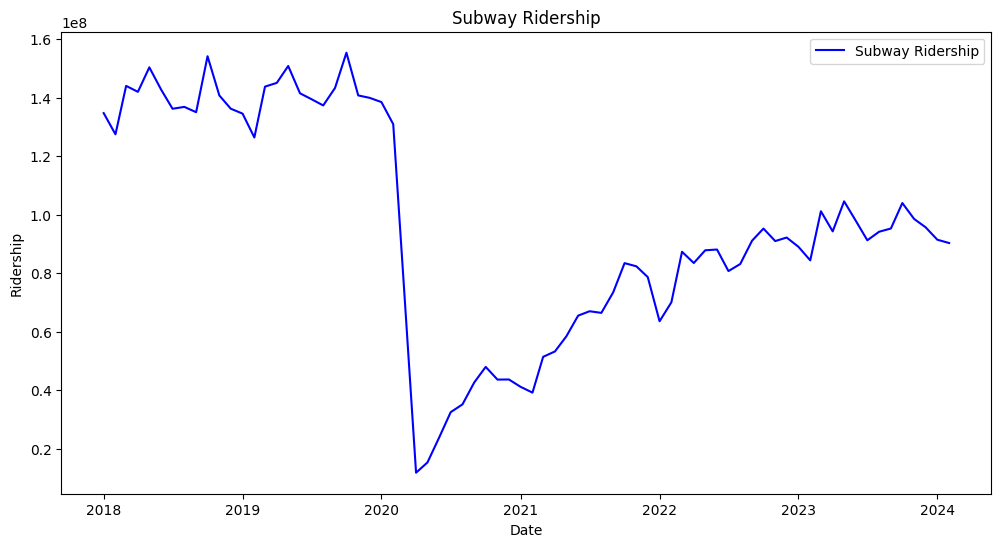

In [ ]:
x = subway.index
y = subway['Ridership']

plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Subway Ridership', color='blue')

# Add titles and labels
plt.title('Subway Ridership')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.legend()

# Display the plot
plt.show()

## BART (Bay Area Rapid Transport) Ridership Data

### Import BART Daily Ridership Data March 2020 - July 2024

Need to finish scraping, ran out of Claude credits

Source: https://www.bart.gov/news/articles/2022/news20221231

In [ ]:
# Upload "BART_Daily_Ridership_Data.csv" into Colab, then store in a DataFrame
uploaded = files.upload()

Saving BART Daily.csv to BART Daily.csv


In [ ]:
daily_bart = pd.read_csv(
    "BART Daily.csv",
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# Display the first and last five rows of the DataFrame
daily_bart.sort_index(inplace =True)

display(daily_bart.head())
display(daily_bart.tail())

<ipython-input-30-d454dc6a6a68>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  daily_bart = pd.read_csv(
<ipython-input-30-d454dc6a6a68>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_bart = pd.read_csv(


,Ridership,% of pre-pandemic
Date,,
2021-09-01,101187,0.24
2021-09-02,103936,0.25
2021-09-03,102948,0.24
2021-09-04,66199,0.43
2021-09-05,51163,0.47


,Ridership,% of pre-pandemic
Date,,
2024-07-25,169492,0.41
2024-07-26,142175,0.34
2024-07-27,82136,0.52
2024-07-28,71312,0.66
2024-07-29,139253,0.34


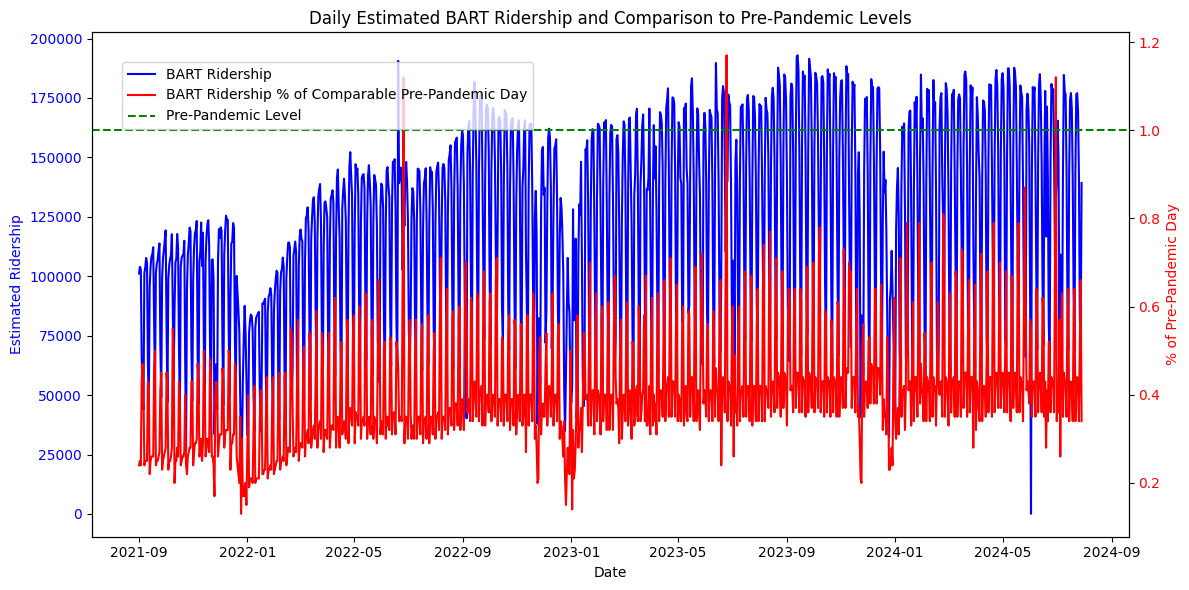

In [ ]:
# Plot BART Ridership vs. Pre-Pandemic Levels
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot subway_est on the primary y-axis
ax1.plot(daily_bart.index, daily_bart['Ridership'], label='BART Ridership', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(daily_bart.index, daily_bart['% of pre-pandemic'], label='BART Ridership % of Comparable Pre-Pandemic Day', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and legend
plt.title('Daily Estimated BART Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.show()